# The Catering Problem

## Motivation

A catering company to cook $n$ dishes, but has only one available oven.
    At most a single dish can be inside the oven at one time.    
    Each dish $i$ has its earliest time when it can be put into the oven $r_i$ (since it needs to be prepared before it is put into the oven), the latest time it should be taken from the oven $d_i$ (since the customers do not want to wait too long), and the time it needs to stay in the oven $p_i$.
    The goal is to find the vector of times $\mathbf{s} = (s_0, \dots, s_{n-1})$ (denoting the times when each dish is put into the oven) such that the finish time of the last dish is minimal.
    
## Input

You are given the following:
* number of dished $n$
* parameters $r_i$, $d_i$ and $p_i$ for each dish $i$

For the testing purposes, you can experiment with the following instance:

In [1]:
!pip install gurobipy
n = 5
params = {
    0: {'r': 20, 'd': 45, 'p': 15},
    1: {'r':  4, 'd': 30, 'p': 19},
    2: {'r':  5, 'd': 80, 'p': 20},
    3: {'r': 17, 'd': 70, 'p':  8},
    4: {'r': 27, 'd': 66, 'p':  7}
}

# Note: parameter d_1 can be obtained by params[1]["d"]

Defaulting to user installation because normal site-packages is not writeable


## Output

You are expected to find the vector $\mathbf{s} = (s_0, \dots, s_{n-1})$ denoting the times when each dish should be put into the oven.

The optimal solution vector for the given instance is $\mathbf{s} = (23, 4, 53, 38, 46)$.

## Exercise

Your task is to formulate the ILP model of the catering problem, solve it, and extract the vector $\mathbf{s}$. The example solution follows:

Hint: to ensure that any two dishes $i$ and $j$ are not overlapping in the oven, you need to ensure that one of the following constraints holds: $s_i + p_i \leq s_j$ or $s_j + p_j \leq s_i$. This might be perhaps done using big-M...

In [2]:
import gurobipy as g  # import Gurobi module

# model -----------------------------------------------------
m = g.Model()

# - ADD VARIABLES
s = m.addVars(n, vtype=g.GRB.CONTINUOUS, lb=[params[i]['r'] for i in range(n)])
Cmax = m.addVar()
x = m.addVars(n, n, vtype=g.GRB.BINARY)

# - ADD CONSTRAINTS
for i in range(n):
  m.addConstr(s[i] >= params[i]['r'])
  m.addConstr(s[i] + params[i]['p'] <= params[i]['d'])
  m.addConstr(s[i] + params[i]['p'] <= Cmax)

M = max([params[i]['d'] for i in range(n)])
for i in range(n):
  for j in range(i+1, n):
    m.addConstr(s[i] + params[i]['p'] <= s[j] + M*(1-x[i,j]))
    m.addConstr(s[j] + params[j]['p'] <= s[i] + M*x[i,j])

# - SET OBJECTIVE
m.setObjective(Cmax, sense=g.GRB.MINIMIZE)

# call the solver -------------------------------------------
m.optimize()

# print the solution ----------------------------------------
print('\nSOLUTION:')
for i in range(n):
  print('i: {}, si: {}'.format(i, s[i].x))


Set parameter Username
Set parameter LicenseID to value 2629039
Academic license - for non-commercial use only - expires 2026-02-27
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) Ultra 9 185H, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 22 logical processors, using up to 22 threads

Optimize a model with 35 rows, 31 columns and 80 nonzeros
Model fingerprint: 0x0287ec20
Variable types: 6 continuous, 25 integer (25 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 3e+01]
  RHS range        [4e+00, 7e+01]
Found heuristic solution: objective 73.0000000
Presolve removed 31 rows and 27 columns
Presolve time: 0.00s
Presolved: 4 rows, 4 columns, 10 nonzeros
Variable types: 3 continuous, 1 integer (1 binary)

Explored 0 nodes (0 simplex iterations) in 0.04 seconds (0.00 work units)
Thread count was 22 (of 22 available processors)

Sol

## Solution visualization

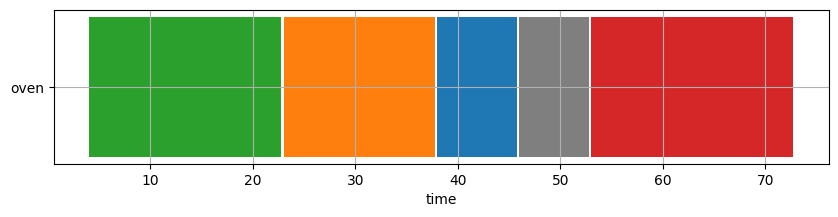

In [3]:
import matplotlib.pyplot as plt

def plot_solution(s, p):
    """
    s: solution vector
    p: processing times
    """
    fig = plt.figure(figsize=(10,2))
    ax = plt.gca()
    ax.set_xlabel('time')
    ax.grid(True)
    ax.set_yticks([2.5])
    ax.set_yticklabels(["oven"])
    eps = 0.25  # just to show spaces between the dishes
    ax.broken_barh([(s[i], p[i]-eps) for i in range(len(s))], (0, 5),
                   facecolors=('tab:orange', 'tab:green', 'tab:red', 'tab:blue', 'tab:gray'))

# TODO: plot your solution
plot_solution([23.0, 4.0, 53.0, 38.0, 46.0], [params[i]["p"] for i in range(n)])

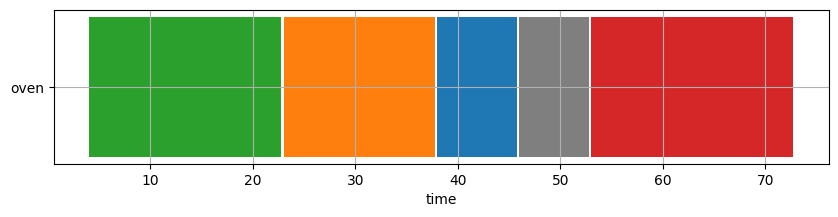

In [4]:
plot_solution([s[i].x for i in range(n)], [params[i]["p"] for i in range(n)])